In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
df = sns.load_dataset('tips')
df['tips_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tips_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 正規性と等分散性の検定
- 小標本の場合、「正規分布かどうか」「等分散かどうか」を確かめる必要がある  
- 「正規分布かどうか」 = シャピロ・ウィルク検定  
- 「等分散かどうか」 = F検定

## シャピロ・ウィルク検定
- 検定の多くは「正規分布に従う」ことを仮定している。正規分布からの標本かどうかを検定する. 
- 帰無仮説は「母集団が正規分布に従う」と設定するが、これを積極的に棄却しようというモチベーションはない. 
- シャピロ・ウィルク検定はQ-Qプロットにおいて、どれくらいずれているかを検定する。  

## Q-Qプロット
- Quantile - Quantileプロット  
- 得られたデータが理論上の分布（例えば正規分布）にどれくらい近しいかを資格的に確認できる. 
- 点が直線に近ければ観測データは理論分布に近い  

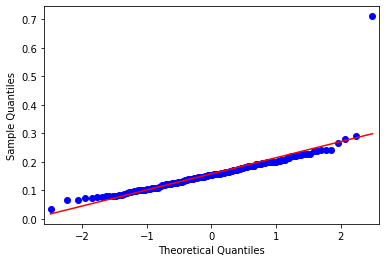

In [27]:
# statsmodels.api.qqplot(data, line='r')

male_tipr = df[df['sex']=='Male']['tips_rate']
female_tipr = df[df['sex']=='Female']['tips_rate']
fig = qqplot(male_tipr, line='r')

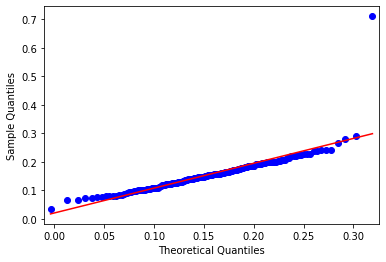

In [28]:
# distにすきな理論分布を入れることでその理論分布のQQプロットを描画できる
fig2 = qqplot(male_tipr, 
              line='r', 
              dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

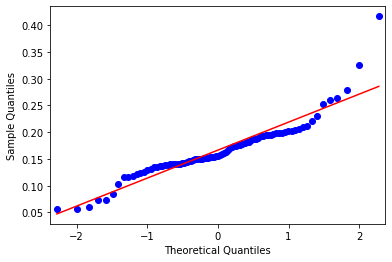

In [29]:
fig = qqplot(female_tipr, line='r')

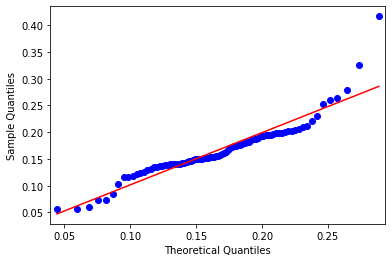

In [30]:
fig2 = qqplot(female_tipr, 
              line='r', 
              dist=stats.norm(loc=np.mean(female_tipr), scale=np.sqrt(stats.tvar(female_tipr))))

In [31]:
# stats.shapiro(x)
# 第一戻り値は検定統計量　第二戻り値はP値
# H2：正規分布ではないという仮説を採択する（おそらく外れ値のため）

stats.shapiro(male_tipr)

(0.7447847127914429, 3.2243281107541917e-15)

In [32]:
stats.shapiro(female_tipr)

(0.8982974290847778, 4.717996489489451e-06)

In [35]:
#　外れ値を取る

array([0.05643341, 0.05679667, 0.05944673, 0.07296137, 0.07358352,
       0.08527132, 0.10252157, 0.11598237, 0.11690246, 0.11841469,
       0.12126246, 0.12338063, 0.12518629, 0.13019892, 0.13033771,
       0.13428827, 0.13553475, 0.13732098, 0.13774105, 0.13793103,
       0.13961519, 0.13998783, 0.14084507, 0.1409396 , 0.14134276,
       0.14140774, 0.14180374, 0.14285714, 0.14481094, 0.14680765,
       0.14688602, 0.14843526, 0.14935506, 0.14938236, 0.15      ,
       0.15015198, 0.15203022, 0.15243902, 0.15267176, 0.15365704,
       0.15384615, 0.15384615, 0.15521855, 0.15558149, 0.1577708 ,
       0.15974441, 0.16166505, 0.16313214, 0.16746411, 0.17133067,
       0.1721943 , 0.17391304, 0.17476489, 0.17574692, 0.17574692,
       0.17798467, 0.17964072, 0.18133491, 0.1817279 , 0.18484288,
       0.18773467, 0.18814675, 0.18839488, 0.19283747, 0.19361084,
       0.19492158, 0.19502868, 0.19505852, 0.19611415, 0.19778481,
       0.19821606, 0.19920319, 0.20034345, 0.20192308, 0.20219

In [37]:
stats.shapiro(np.sort(male_tipr)[:-1])

(0.9931070804595947, 0.6644759774208069)

In [38]:
stats.shapiro(np.sort(female_tipr)[:-1])

(0.9585995078086853, 0.00757835665717721)

## F検定
- 2軍の等分散性の検定には、分散の比率を検定統計量につかう  
- 大きい比率を分子に置く  
- F分布はχ二乗を使って表せる  
- F分布には2つ自由度がある。F値は1以上。p値はf値よりも右側の面積になる. 

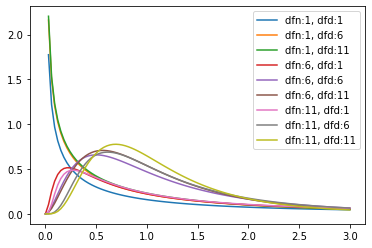

In [47]:
# stats.f(dfn, dfd)

x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
        plt.plot(x, y, label=f'dfn:{dfn}, dfd:{dfd}')
plt.legend()        

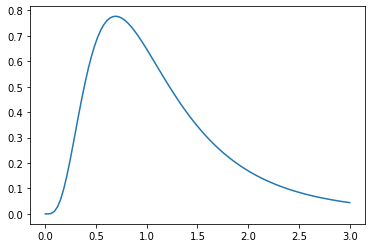

In [48]:
plt.plot(x, y)

In [75]:
x = df[df['sex']=='Male']['tips_rate']
y = df[df['sex']=='Female']['tips_rate']
x_var = stats.tvar(x)
y_var = stats.tvar(y)
f_value = x_var/y_var
dfn = len(x)-1
dfd = len(y)-1

In [76]:
print(x_var, y_var, f_value)

0.004196172792769981 0.002876362058404039 1.4588472200534603


In [84]:
stats.f(dfn=dfn, dfd=dfd).sf(f_value) #右側の面積、つまりp値を求めている

0.027100863454374447

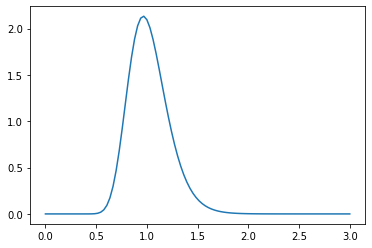

In [85]:
x = np.linspace(0, 3, 100)
y = stats.f(dfn, dfd).pdf(x)
plt.plot(x, y)